# Dataset

## Base

### Imports

In [1]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
from scipy import signal
import pandas as pd
import numpy as np
import requests
import os

### Dataset and Figure Settings

In [20]:
# This is the name we'll set for the file
fname = 'motor_imagery.npz'
# This is where we download the dataset from
url = "https://osf.io/ksqv8/download"

# Check if the file is already there
if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

# Figure settings
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

### Helper Functions

In [17]:
class process():
    def __init__():
        """
        This class is used to preprocess the data.
        The input is a dict with a key 'V' containing the voltage data.
        """
        return

    def preprocess(data):
        V = data['V'].astype('float32')
        b, a = signal.butter(3, [50], btype='high', fs=1000)
        V = signal.filtfilt(b, a, V, 0)
        V = np.abs(V)**2
        b, a = signal.butter(3, [10], btype='low', fs=1000)
        V = signal.filtfilt(b, a, V, 0)
        V = V/V.mean(0)
        return V

class plots():
    def __init__():
        """
        For plotting the dataset
        """
        return

    def singlechannel1(data, channel, trange):
        plt.figure(figsize=(20,10))
        plt.plot(trange, data[:,channel])
        plt.title('ch%d'%channel)
        plt.xticks([0, 1000, 2000])
        plt.ylim([0, 4])

    def singlechannel2(data, data2, channel, trange):
        plt.figure(figsize=(20,10))
        plt.plot(trange, data[:,channel])
        plt.plot(trange, data2[:,channel])
        plt.title('ch%d'%channel)
        plt.xticks([0, 1000, 2000])
        plt.ylim([0, 4])

    def all_channels1(data, trange):
        plt.figure(figsize=(20,10))
        for j in range(46):
            ax = plt.subplot(5,10,j+1)
            plt.plot(trange, data[:,j])
            plt.title('ch%d'%j)
            plt.xticks([0, 1000, 2000])
            plt.ylim([0, 4])

    def all_channels2(data, data2, trange):
        plt.figure(figsize=(20,10))
        for j in range(46):
            ax = plt.subplot(5,10,j+1)
            plt.plot(trange, data[:,j])
            plt.plot(trange, data2[:,j])
            plt.title('ch%d'%j)
            plt.xticks([0, 1000, 2000])
            plt.ylim([0, 4])

## Setting up the Dataset

In [21]:
# Load the data
DataLoad = np.load(fname, allow_pickle=True)['dat']
# Print the data
type(DataLoad), len(DataLoad), DataLoad.shape, DataLoad[0][0].keys()

(numpy.ndarray,
 7,
 (7, 2),
 dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area']))

In [22]:
# This is where we'll keep all the processed data
realV = {}
imagV = {}

# This is where we'll hold all the metadata
realMeta = {}
imagineMeta = {}

In [23]:
# These are the keys we'll be filtering for in the dataset
desiredKeys = ['t_off', 'stim_id', 't_on', 'V', 'scale_uv', 'locs', 'srate']

In [5]:
for i in range(7):
    print(f"Sample rate of participant (real) {i}: {DataLoad[i][0]['srate']}")
    print(f"Sample rate of participant (imagine) {i}: {DataLoad[i][1]['srate']}")
    
    x = process.preprocess(DataLoad[i][0])
    nt, nchan = x.shape
    nstim = len(DataLoad[i][0]['t_on'])
    trange = np.arange(0, 2000)
    ts = DataLoad[i][0]['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(x[ts, :], (nstim, 2000, nchan))
    print(V_epochs.shape)
    realV[i] = V_epochs
    realSet[i] = {key: DataLoad[i][0][key] for key in desiredKeys}

    y = process.preprocess(DataLoad[i][1])
    nt, nchan = y.shape
    nstim = len(DataLoad[i][1]['t_on'])
    trange = np.arange(0, 2000)
    ts = DataLoad[i][1]['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(y[ts, :], (nstim, 2000, nchan))
    print(V_epochs.shape)
    imagineV[i] = V_epochs
    imagineSet[i] = {key: DataLoad[i][1][key] for key in desiredKeys}


Sample rate of participant (real) 0: 1000
Sample rate of participant (imagine) 0: 1000
(60, 2000, 46)
(60, 2000, 46)
Sample rate of participant (real) 1: 1000
Sample rate of participant (imagine) 1: 1000
(60, 2000, 64)
(60, 2000, 64)
Sample rate of participant (real) 2: 1000
Sample rate of participant (imagine) 2: 1000
(60, 2000, 48)
(60, 2000, 48)
Sample rate of participant (real) 3: 1000
Sample rate of participant (imagine) 3: 1000
(60, 2000, 48)
(60, 2000, 48)
Sample rate of participant (real) 4: 1000
Sample rate of participant (imagine) 4: 1000
(60, 2000, 64)
(60, 2000, 64)
Sample rate of participant (real) 5: 1000
Sample rate of participant (imagine) 5: 1000
(60, 2000, 64)
(60, 2000, 64)
Sample rate of participant (real) 6: 1000
Sample rate of participant (imagine) 6: 1000
(60, 2000, 64)
(60, 2000, 64)


In [19]:
# Here realV = V_epochs_pr

{0: array([[[1.03239824, 2.08178703, 0.79472739, ..., 0.93985631,
          1.5605287 , 0.95993965],
         [1.03252003, 2.05635799, 0.79412391, ..., 0.93808527,
          1.56011052, 0.97469385],
         [1.03232262, 2.03121664, 0.79408847, ..., 0.93617379,
          1.55926123, 0.98939462],
         ...,
         [0.58633759, 1.33888816, 1.5196949 , ..., 1.11650211,
          1.80673885, 0.79530669],
         [0.58099188, 1.32820479, 1.49424012, ..., 1.11764887,
          1.79386666, 0.79505026],
         [0.57568396, 1.31743287, 1.46867311, ..., 1.119119  ,
          1.77982419, 0.79589185]],
 
        [[0.91997634, 0.9021236 , 1.04112229, ..., 1.25907677,
          1.03795198, 0.83678798],
         [0.92124544, 0.89603622, 1.04965135, ..., 1.25797712,
          1.04196172, 0.84543885],
         [0.92258212, 0.88973869, 1.0586183 , ..., 1.25595122,
          1.04500122, 0.8540241 ],
         ...,
         [0.35918222, 0.90445972, 1.21099095, ..., 1.63285724,
          1.21504006,

In [6]:
# realV contains the preprocessed and properly filtered data for the real movement trials
realV
# realSet contains the metadata for the real movement trials
realSet

# imagineV contains the preprocessed and properly filtered data for the imagined movement trials
imagineV
# imagineSet contains the metadata for the imagined movement trials
imagineSet

{0: {'t_off': array([ 13160,  19160,  25160,  31200,  37280,  43280,  49320,  55360,
          61440,  67480,  73520,  79600,  85680,  91720,  97800, 103800,
         109840, 115840, 121920, 127960, 133960, 140000, 146080, 152120,
         158200, 164240, 170320, 176320, 182400, 188440, 194440, 200480,
         206480, 212520, 218560, 224640, 230720, 236760, 242840, 248880,
         254920, 260920, 266960, 273000, 279000, 285080, 291080, 297080,
         303120, 309200, 315280, 321360, 327400, 333440, 339520, 345560,
         351600, 357640, 363640, 369640], dtype=int64),
  'stim_id': array([11, 12, 11, 12, 12, 12, 11, 12, 11, 11, 11, 11, 11, 11, 12, 11, 12,
         11, 12, 11, 11, 12, 12, 11, 12, 11, 12, 12, 12, 12, 11, 12, 12, 11,
         12, 11, 12, 11, 11, 11, 11, 12, 12, 12, 11, 12, 11, 12, 12, 12, 11,
         11, 12, 12, 11, 12, 11, 12, 11, 11]),
  't_on': array([ 10160,  16160,  22160,  28200,  34280,  40280,  46320,  52360,
          58440,  64480,  70520,  76600,  82680,  8

In [7]:
realV[0]

array([[[1.03239824, 2.08178703, 0.79472739, ..., 0.93985631,
         1.5605287 , 0.95993965],
        [1.03252003, 2.05635799, 0.79412391, ..., 0.93808527,
         1.56011052, 0.97469385],
        [1.03232262, 2.03121664, 0.79408847, ..., 0.93617379,
         1.55926123, 0.98939462],
        ...,
        [0.58633759, 1.33888816, 1.5196949 , ..., 1.11650211,
         1.80673885, 0.79530669],
        [0.58099188, 1.32820479, 1.49424012, ..., 1.11764887,
         1.79386666, 0.79505026],
        [0.57568396, 1.31743287, 1.46867311, ..., 1.119119  ,
         1.77982419, 0.79589185]],

       [[0.91997634, 0.9021236 , 1.04112229, ..., 1.25907677,
         1.03795198, 0.83678798],
        [0.92124544, 0.89603622, 1.04965135, ..., 1.25797712,
         1.04196172, 0.84543885],
        [0.92258212, 0.88973869, 1.0586183 , ..., 1.25595122,
         1.04500122, 0.8540241 ],
        ...,
        [0.35918222, 0.90445972, 1.21099095, ..., 1.63285724,
         1.21504006, 0.67808357],
        [0.3

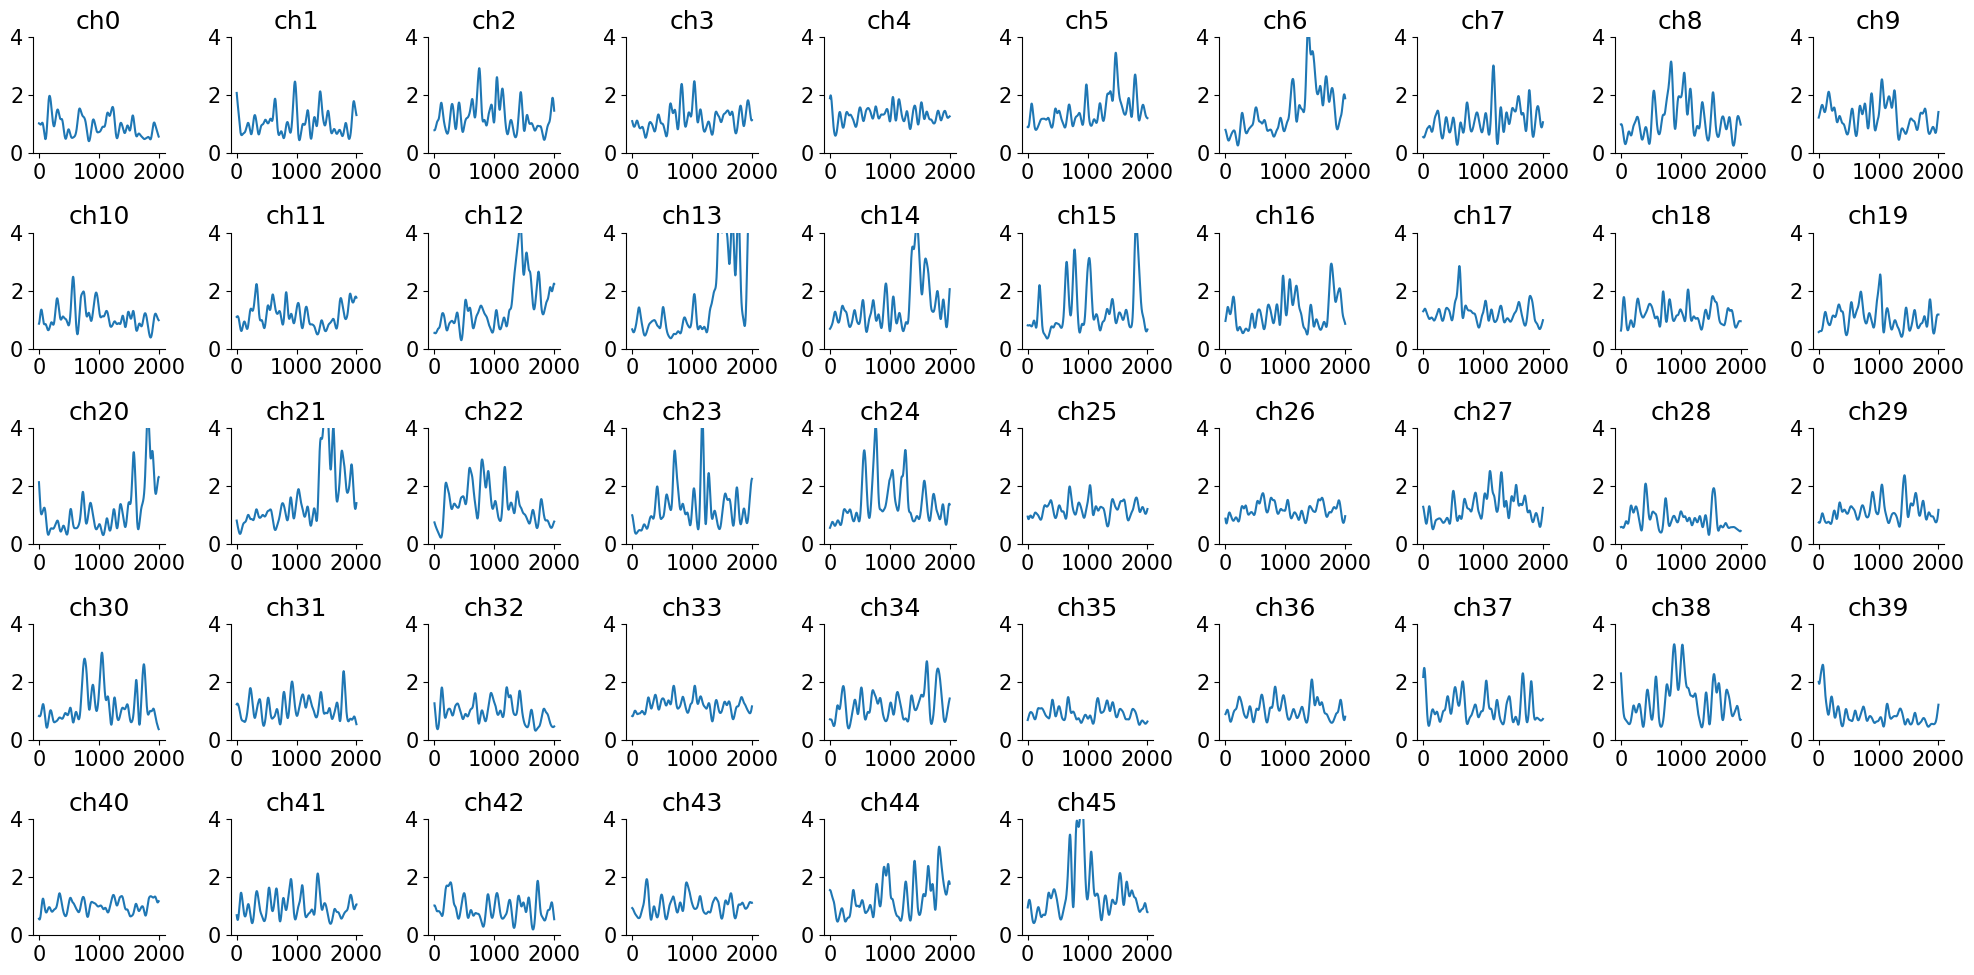

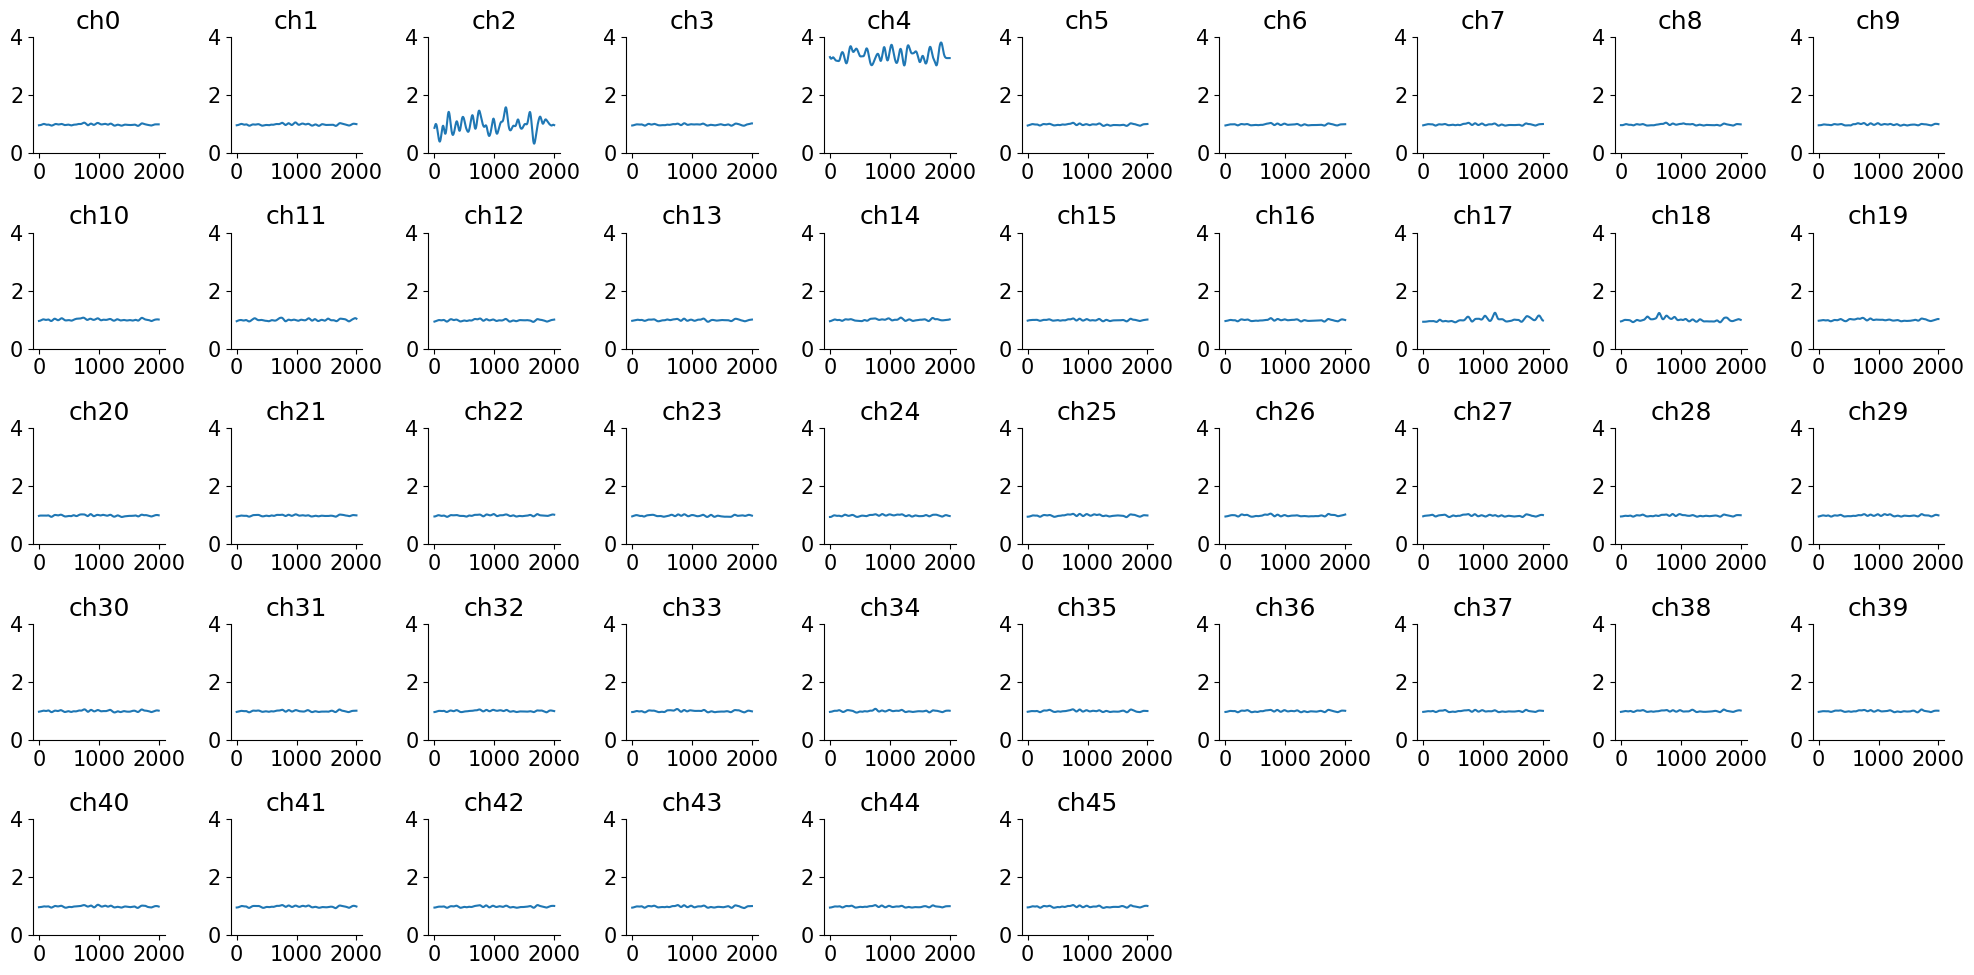

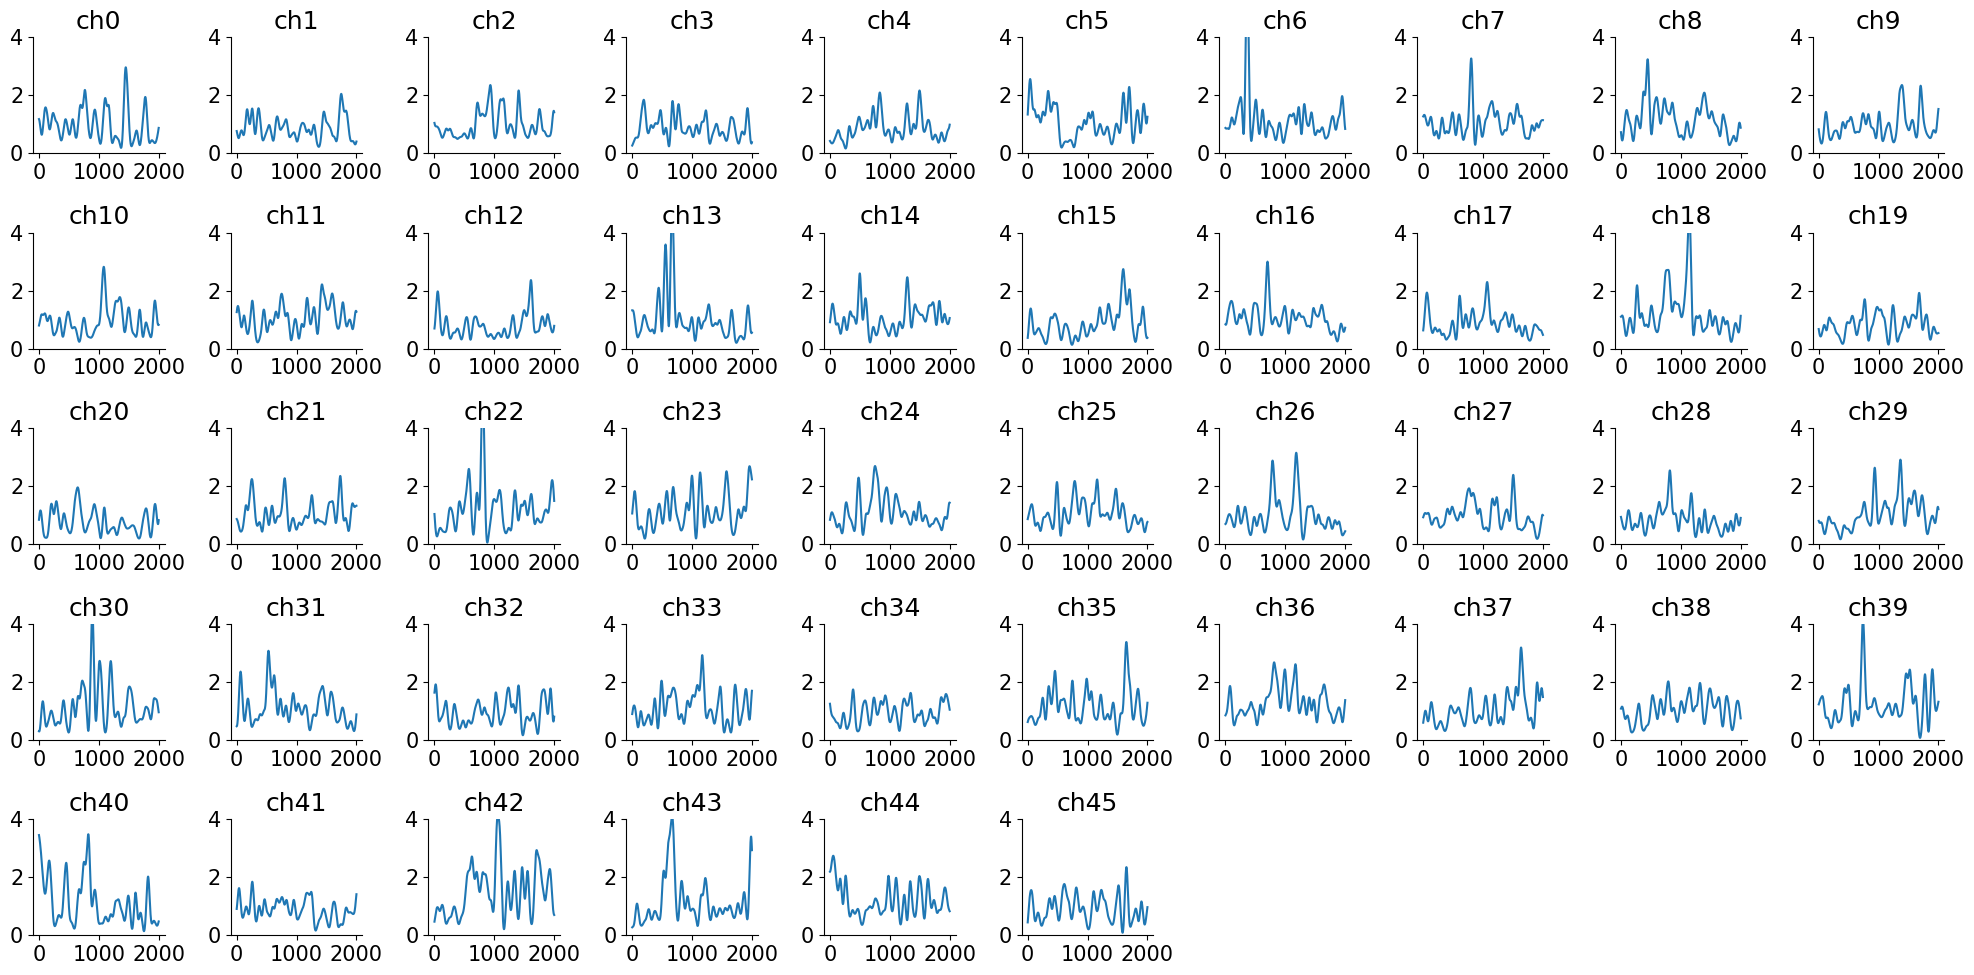

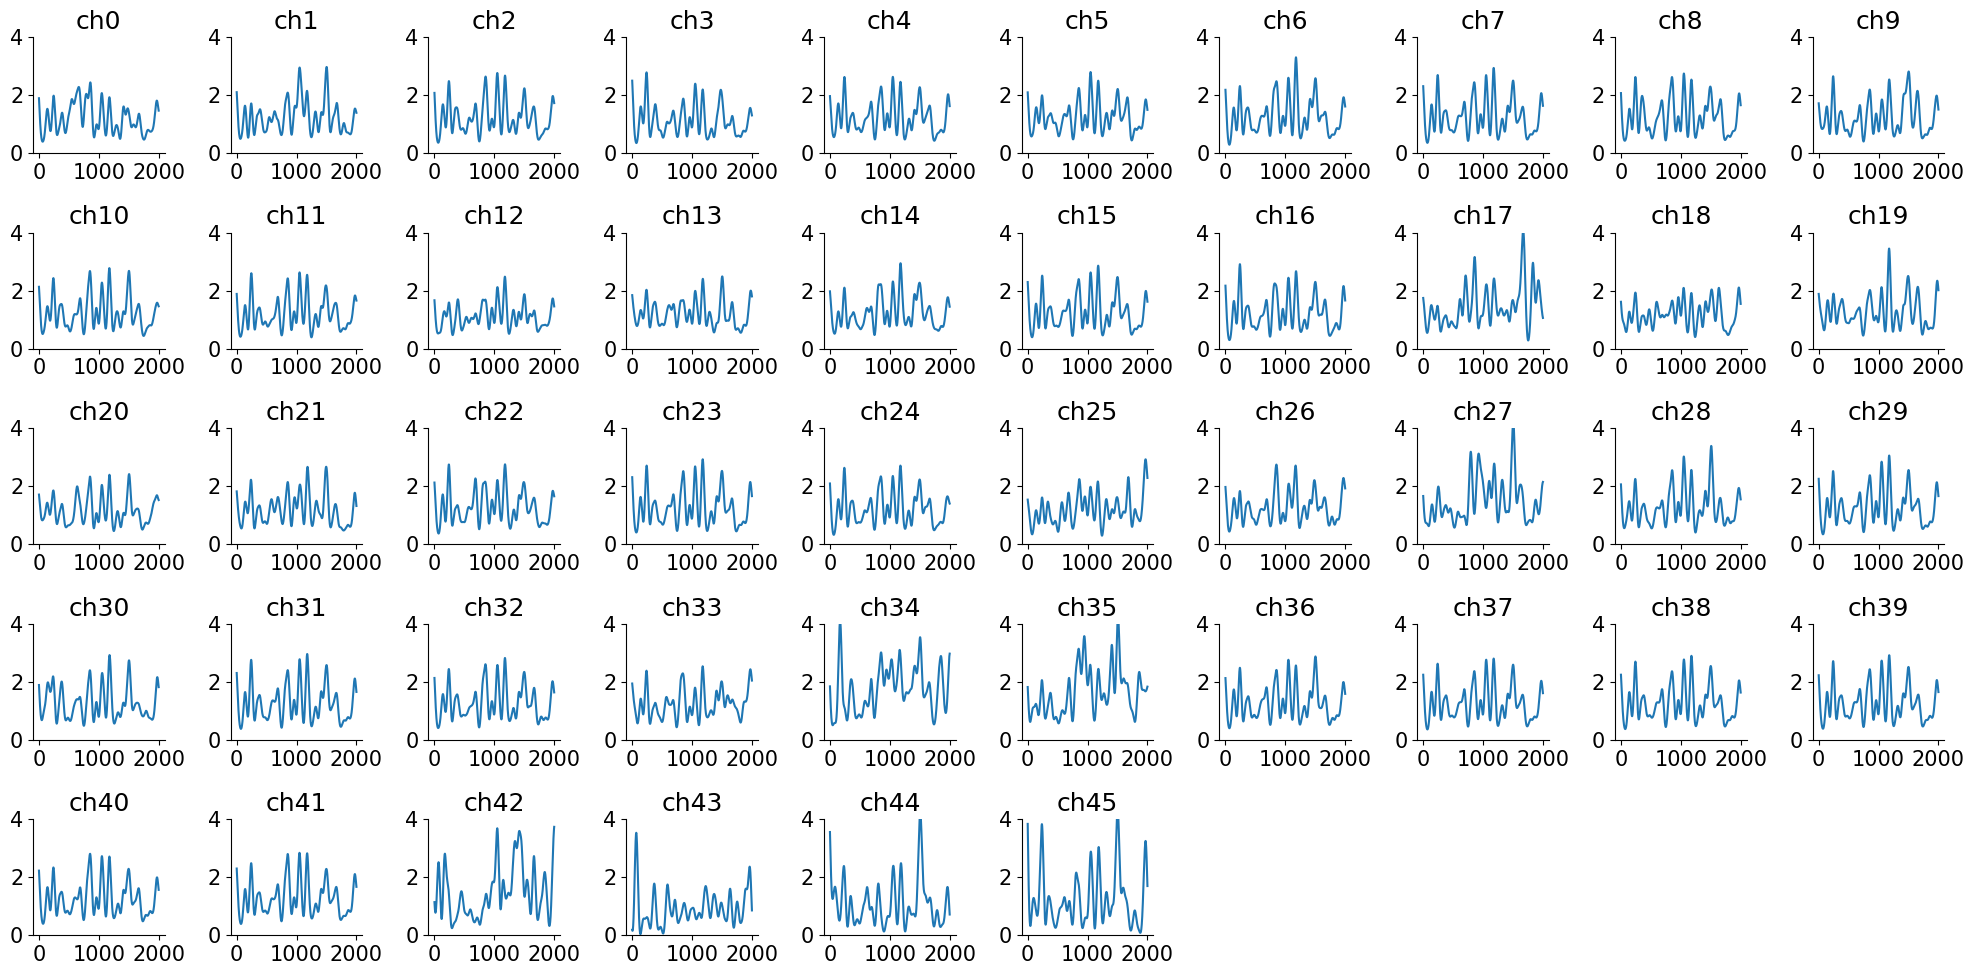

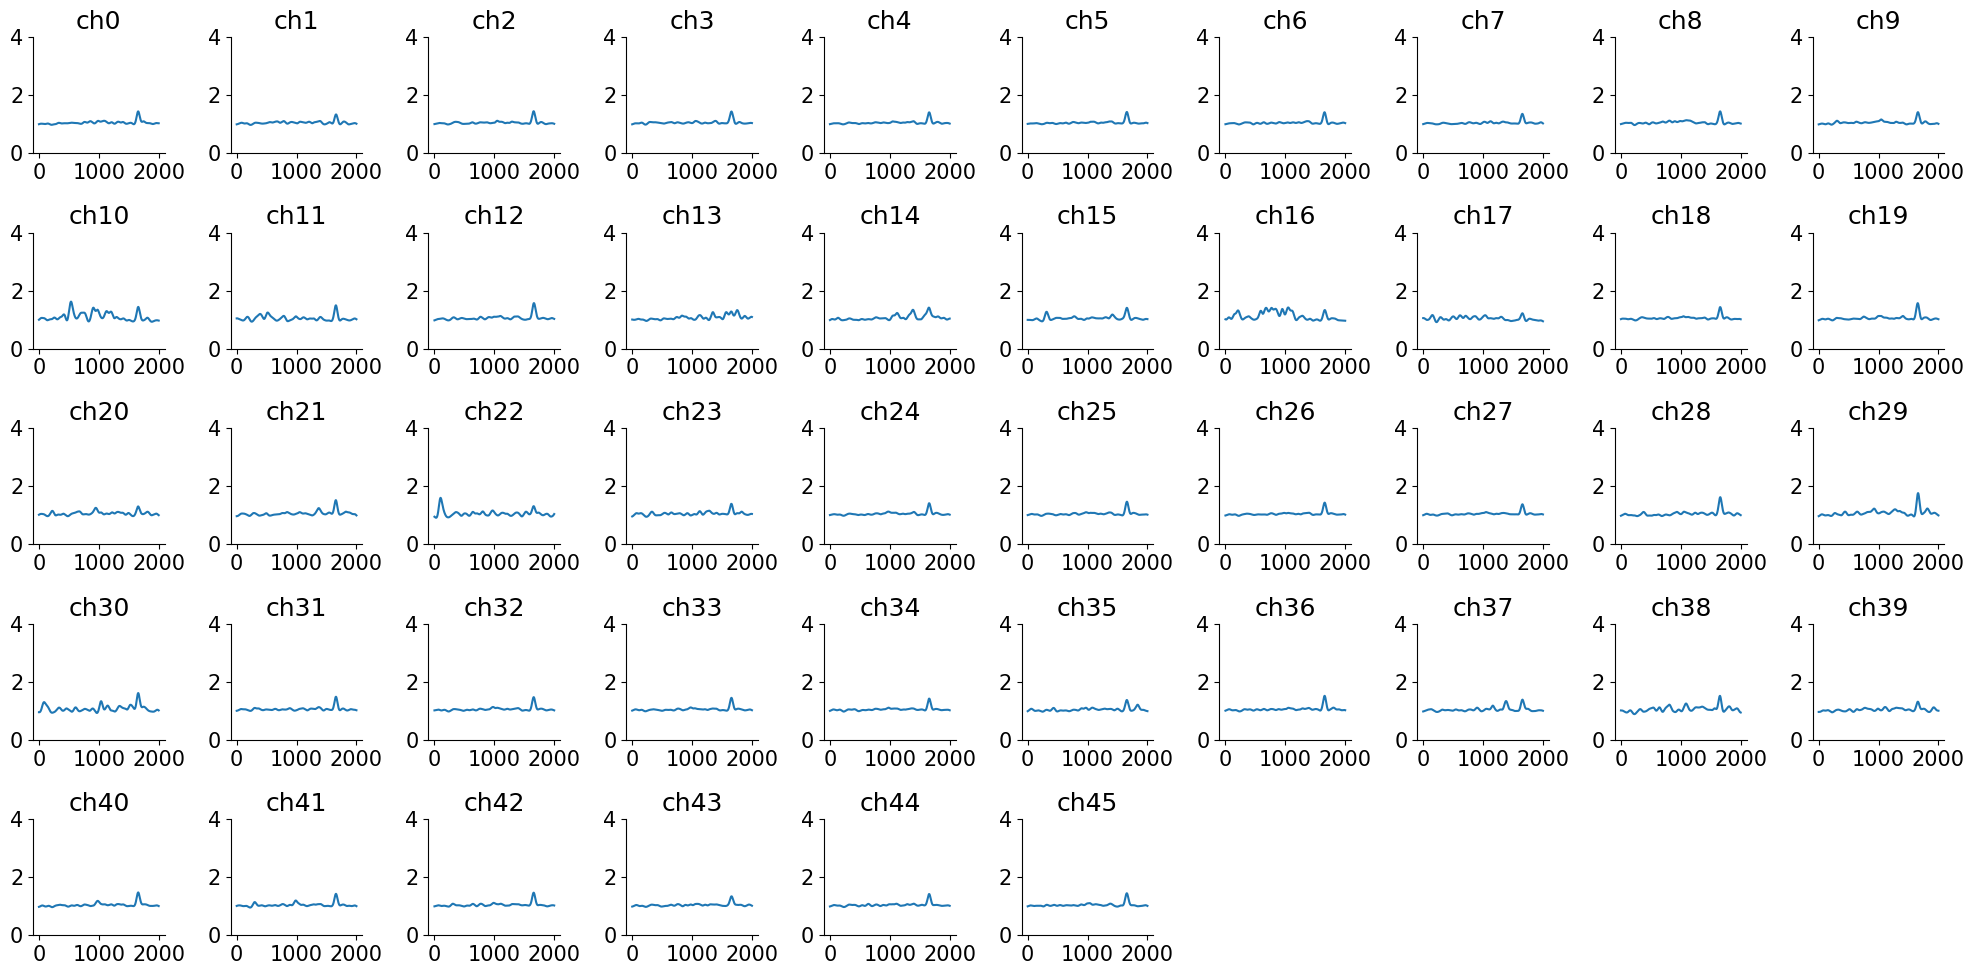

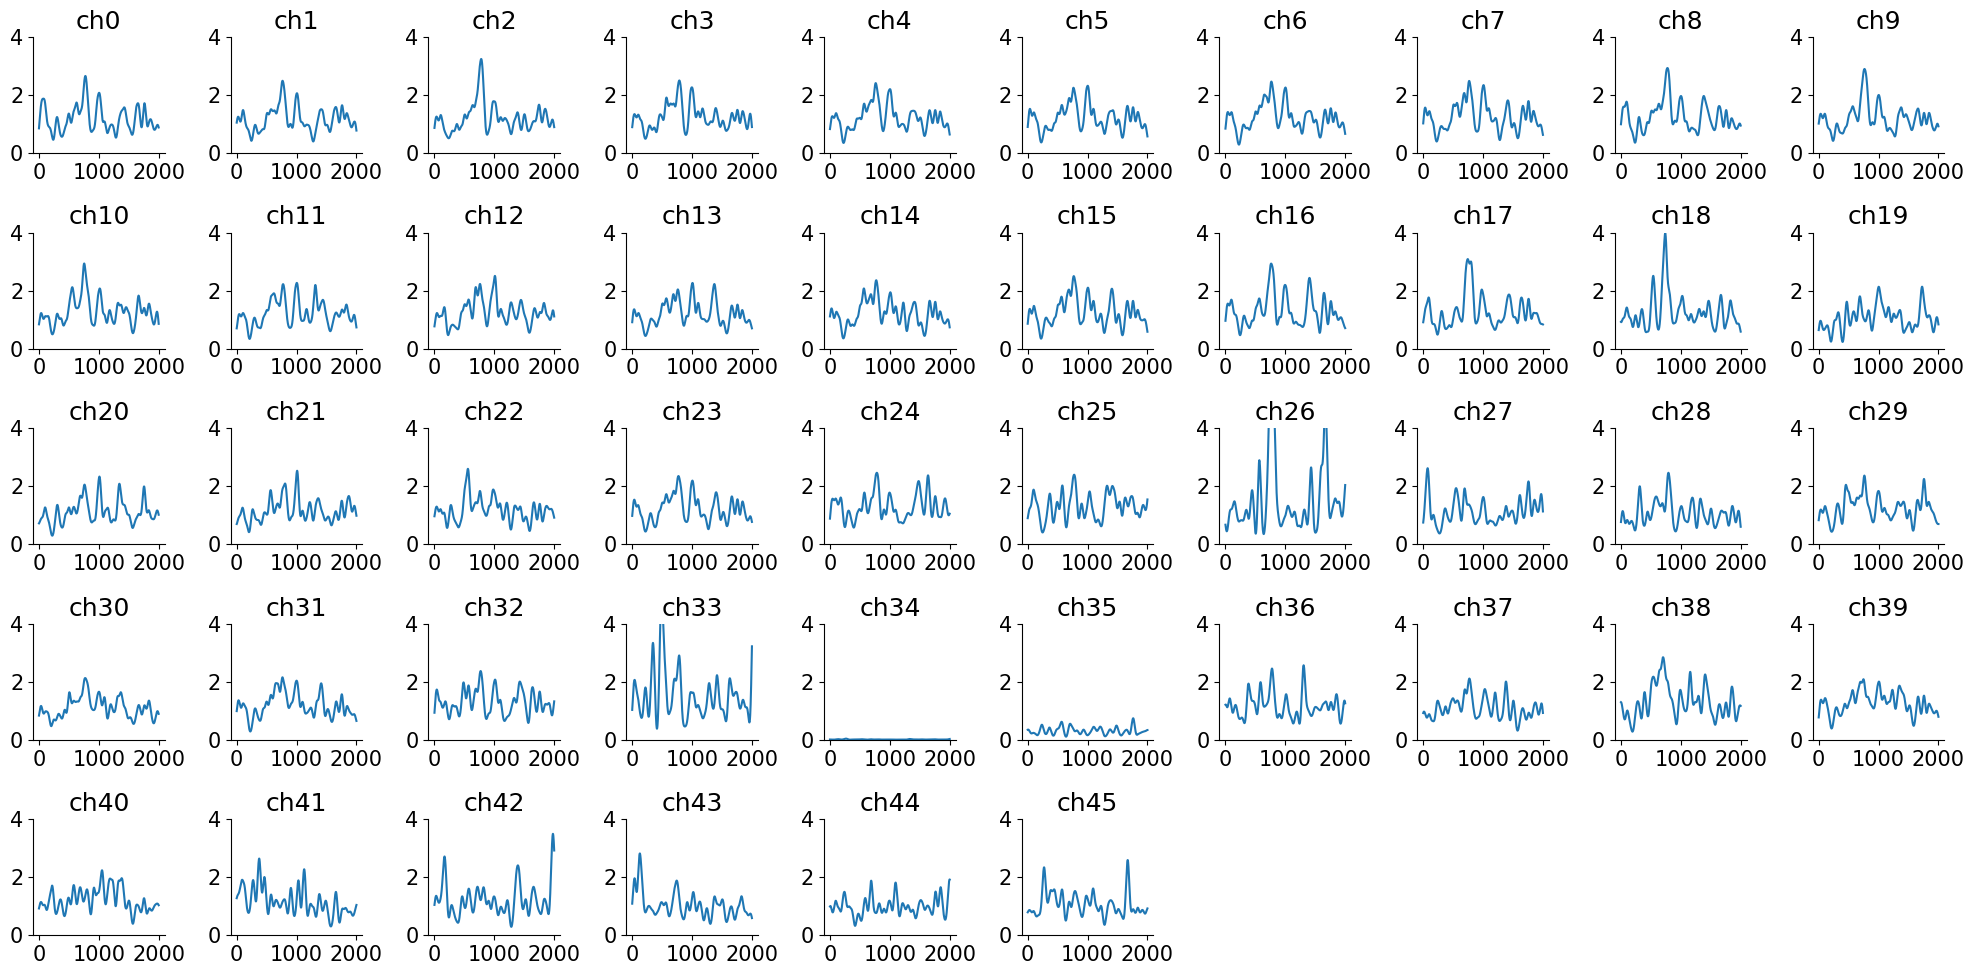

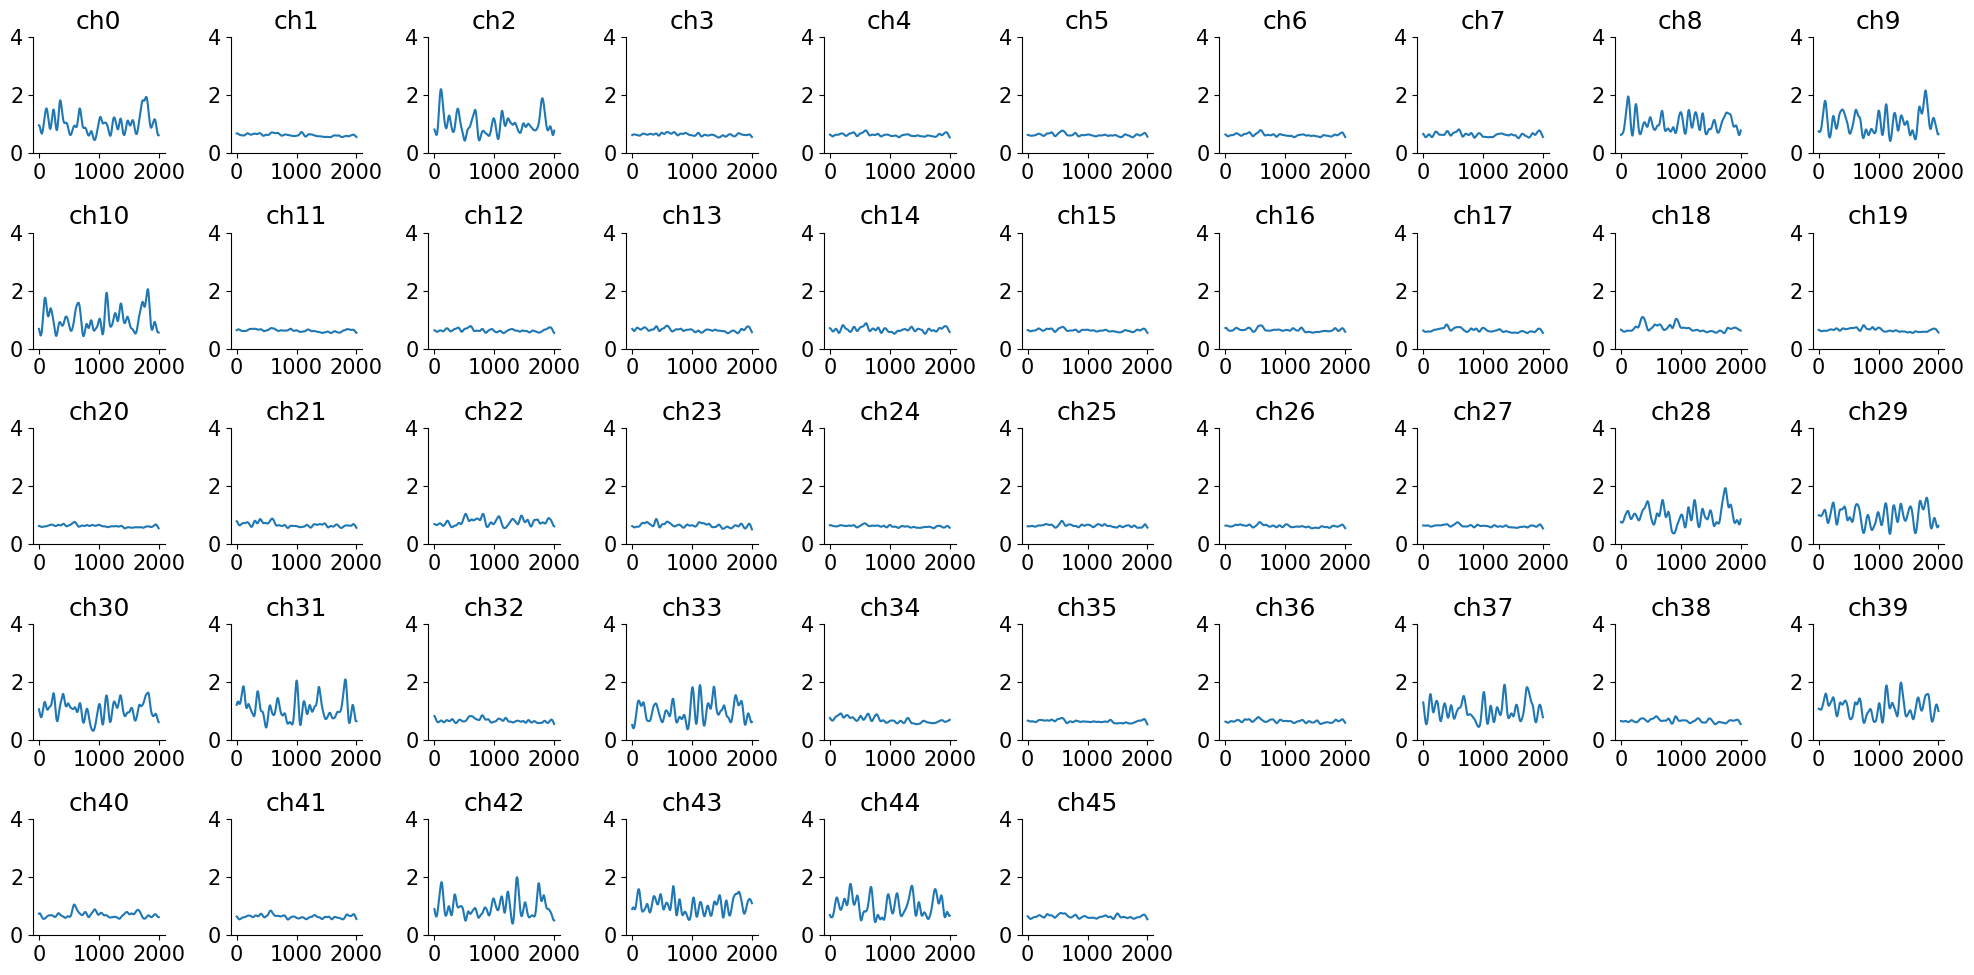

In [8]:
for i in range(7):
    plots.all_channels1(realV[i][0], trange)

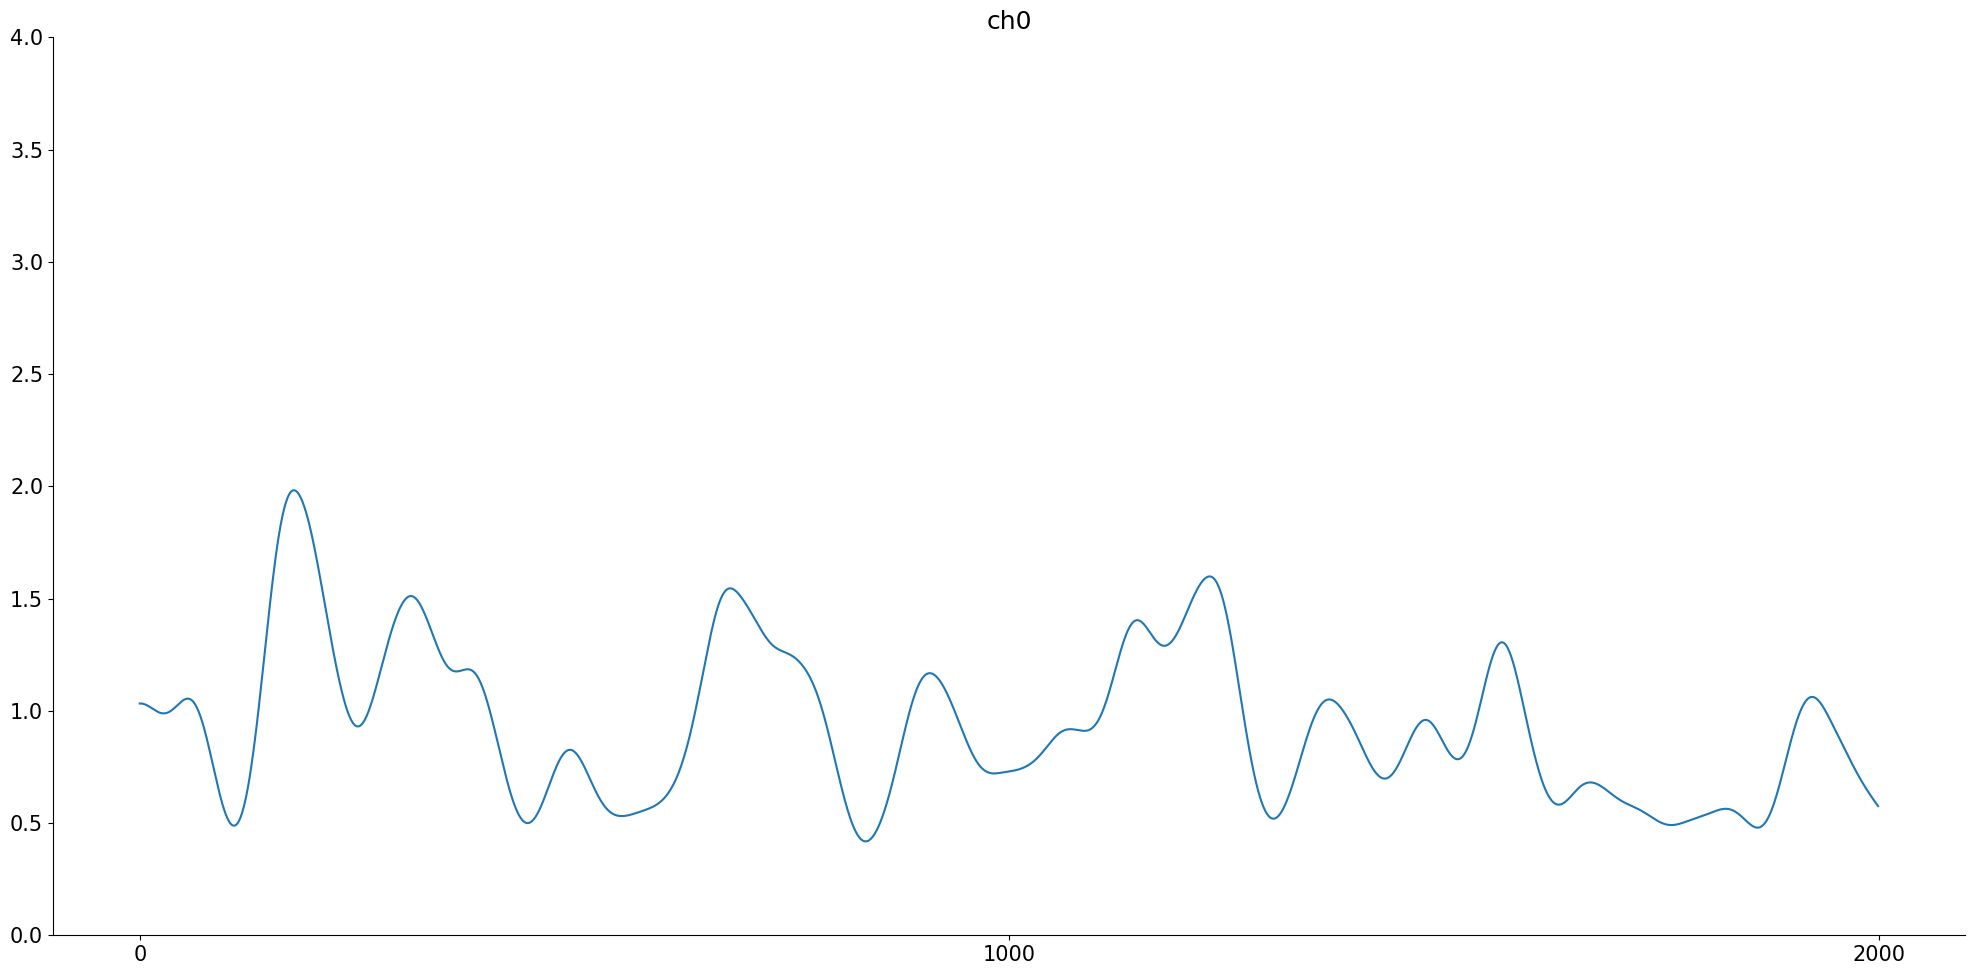

In [9]:
plots.singlechannel1(realV[0][0], 0, trange)

In [10]:
Dataset = realSet
Participant = 0

In [11]:
data_items = Dataset[Participant].items()
data_for_df = list(data_items)
data_for_df

[('t_off',
  array([ 13160,  19160,  25160,  31240,  37240,  43320,  49360,  55440,
          61520,  67600,  73680,  79680,  85680,  91720,  97760, 103760,
         109800, 115840, 121880, 127960, 134040, 140080, 146160, 152160,
         158160, 164160, 170240, 176320, 182320, 188320, 194320, 200400,
         206400, 212480, 218520, 224520, 230560, 236600, 242640, 248640,
         254640, 260720, 266760, 272800, 278840, 284840, 290880, 296880,
         302880, 308920, 314920, 321000, 327000, 333080, 339120, 345200,
         351240, 357320, 363360, 369440], dtype=int64)),
 ('stim_id',
  array([12, 12, 12, 11, 12, 12, 12, 11, 11, 12, 12, 11, 11, 11, 12, 11, 11,
         11, 12, 12, 11, 11, 12, 11, 11, 12, 12, 12, 11, 11, 12, 11, 12, 12,
         12, 12, 11, 12, 11, 12, 12, 11, 11, 12, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 11, 12, 11, 11, 12, 11, 11])),
 ('t_on',
  array([ 10160,  16160,  22160,  28240,  34240,  40320,  46360,  52440,
          58520,  64600,  70680,  76680,  8268

In [12]:
data1 = pd.DataFrame.from_dict(data_for_df, orient='columns')
data1

,0,1
0,t_off,"[13160, 19160, 25160, 31240, 37240, 43320, 493..."
1,stim_id,"[12, 12, 12, 11, 12, 12, 12, 11, 11, 12, 12, 1..."
2,t_on,"[10160, 16160, 22160, 28240, 34240, 40320, 463..."
3,V,"[[1.113, 0.595, 0.2395, 1.161, 0.507, 1.755, -..."
4,scale_uv,"[48.769698129802485, 52.42750508796776, 61.506..."
5,locs,"[[-26.453523118864688, 39.98872529190197, 42.6..."
6,srate,1000


In [13]:
df1 = pd.DataFrame(columns=data1[0])
print(data1[1][5].shape)

(46, 3)


In [14]:
df1['t_off']=(np.ndarray.tolist(data1[1][0]))
df1['stim_id']=(np.ndarray.tolist(data1[1][1]))
df1['t_on']=(np.ndarray.tolist(data1[1][2]))
df1['V'] = (np.ndarray.tolist(V_epochs))
df1['scale_uv'] = 1000
df1 = df1[['t_on','t_off','stim_id','V']]

options = [12]

df1 = df1[df1['stim_id'].isin(options)]

df1

,t_on,t_off,stim_id,V
0,10160,13160,12,"[[0.8429553575918203, 1.2067566324737744, 0.88..."
1,16160,19160,12,"[[0.9454932442759709, 1.1894761892994452, 0.80..."
2,22160,25160,12,"[[0.9073292618739506, 0.9517245026649817, 0.78..."
4,34240,37240,12,"[[1.112527178653705, 1.7940085326731992, 0.942..."
5,40320,43320,12,"[[0.8306131119962396, 0.9716453977795567, 1.04..."
6,46360,49360,12,"[[1.0191082704479175, 0.9575403402119299, 0.69..."
9,64600,67600,12,"[[0.7715533052039976, 0.9939838485073618, 1.24..."
10,70680,73680,12,"[[0.906547488487166, 1.0408991346502032, 0.586..."
14,94760,97760,12,"[[0.8005407746547578, 1.157983565683384, 1.369..."
18,118880,121880,12,"[[0.8807014443577675, 2.2265781567362284, 0.98..."


In [15]:
df1.index[1:]

Index([ 1,  2,  4,  5,  6,  9, 10, 14, 18, 19, 22, 25, 26, 27, 30, 32, 33, 34,
       35, 37, 39, 40, 43, 49, 50, 51, 52, 54, 57],
      dtype='int64')

In [16]:

df1['V'][0]=[list(x) for x in zip(*df1['V'][0])]


for i in df1.index[1:]:
  df1['V'][i]=[list(x) for x in zip(*df1['V'][i])]

df1

C:\Users\priya\AppData\Local\Temp\ipykernel_21956\2776539867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['V'][i]=[list(x) for x in zip(*df1['V'][i])]
C:\Users\priya\AppData\Local\Temp\ipykernel_21956\2776539867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['V'][i]=[list(x) for x in zip(*df1['V'][i])]
C:\Users\priya\AppData\Local\Temp\ipykernel_21956\2776539867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

,t_on,t_off,stim_id,V
0,10160,13160,12,"[[0.8429553575918203, 0.8435810596766445, 0.84..."
1,16160,19160,12,"[[0.9454932442759709, 0.9542760597632042, 0.96..."
2,22160,25160,12,"[[0.9073292618739506, 0.9122847174832832, 0.91..."
4,34240,37240,12,"[[1.112527178653705, 1.1193587756926857, 1.126..."
5,40320,43320,12,"[[0.8306131119962396, 0.8364328814784925, 0.84..."
6,46360,49360,12,"[[1.0191082704479175, 1.0145182209849537, 1.00..."
9,64600,67600,12,"[[0.7715533052039976, 0.7871795996441455, 0.80..."
10,70680,73680,12,"[[0.906547488487166, 0.8978798359021417, 0.889..."
14,94760,97760,12,"[[0.8005407746547578, 0.8077568235736584, 0.81..."
18,118880,121880,12,"[[0.8807014443577675, 0.8735961919656227, 0.86..."
